# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [65]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

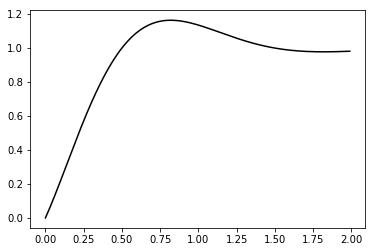

In [66]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

In [67]:
def f(t,a):
    return 1 - (np.exp(-1*a*t))

In [68]:
print(type(f(t1,4)))

<class 'numpy.ndarray'>


In [69]:
np.linalg.norm(f(t1,4)-g(t1))

1.5615646116820909

In [70]:
#Minimize Distance Function recursively calculates value of a which minimizes distance
def minimize_distance(seed,step,min_change):
    distance = np.linalg.norm(f(t1,seed)-g(t1))
    a_list.append(seed)
    print("a = ",seed,"\tstep = ",step,"\tdistance = ",distance,"\tconverge at step<",min_change)
    
    # if step is below minimum change, assume convergance
    # return current a value and distance
    if(abs(step)<min_change):
        return (seed,distance)
    
    # Calculate distances with up and down step
    p_distance = np.linalg.norm(f(t1,seed+step)-g(t1))
    n_distance = np.linalg.norm(f(t1,seed-step)-g(t1))     
    
    # If current distance is minimum, divide step by 2 and calculate distance again
    if(distance <= p_distance and distance <= n_distance):
        return minimize_distance(seed, step/2, min_change)
    
    # If seed value + step is minimum distance, move a to seed+step, and calculate distance again
    elif(p_distance <= distance and p_distance <= n_distance):
        return minimize_distance(seed+step, step, min_change)
    
    # If seed value + step is minimum distance, move a to seed-step, and calculate distance again
    elif(n_distance <= distance and n_distance <= p_distance):
        return minimize_distance(seed-step, -1*step, min_change)
    

In [71]:
a_list = []
(a,distance)=minimize_distance(8,4,.001)

a =  8 	step =  4 	distance =  2.03618118272 	converge at step< 0.001
a =  4 	step =  -4 	distance =  1.56156461168 	converge at step< 0.001
a =  4 	step =  -2.0 	distance =  1.56156461168 	converge at step< 0.001
a =  4 	step =  -1.0 	distance =  1.56156461168 	converge at step< 0.001
a =  5.0 	step =  1.0 	distance =  1.52252460923 	converge at step< 0.001
a =  5.0 	step =  0.5 	distance =  1.52252460923 	converge at step< 0.001
a =  4.5 	step =  -0.5 	distance =  1.50597915841 	converge at step< 0.001
a =  4.5 	step =  -0.25 	distance =  1.50597915841 	converge at step< 0.001
a =  4.5 	step =  -0.125 	distance =  1.50597915841 	converge at step< 0.001
a =  4.625 	step =  0.125 	distance =  1.5045986433 	converge at step< 0.001
a =  4.625 	step =  0.0625 	distance =  1.5045986433 	converge at step< 0.001
a =  4.625 	step =  0.03125 	distance =  1.5045986433 	converge at step< 0.001
a =  4.59375 	step =  -0.03125 	distance =  1.50455103138 	converge at step< 0.001
a =  4.59375 	step =

In [72]:
a_list = list(set(a_list))
print(a_list)

[4.5, 4.625, 4, 5.0, 8, 4.59375, 4.609375, 4.6015625, 4.603515625]


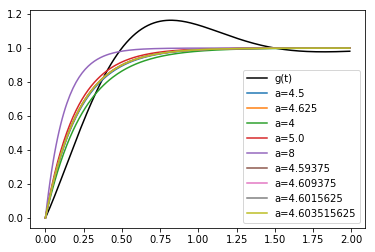

In [73]:
plt.figure(2)

plt.plot(t1,g(t1),label = 'g(t)', color = 'k')
plt.legend()

for a in a_list:
    plt.plot(t1,f(t1,a),label='a='+str(a))
    plt.legend()

plt.show()



In [74]:
print("Calculating Mean Square Residual Error")
mean_squared_error(g(t1),f(t1,a))

Calculating Mean Square Residual Error


0.011318183491597635